### All imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

### Reading data

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### check and modify dataset 

In this dataset some columns has many 0 value so we replace with another value by cheking that specific columns

In [6]:
df["Pregnancies"].eq(0).sum()

111

In [7]:
df["SkinThickness"].eq(0).sum()

227

In [8]:
df["Insulin"].eq(0).sum()

374

In [9]:
print(df["Pregnancies"].mean())
print(df["Pregnancies"].median())

3.8450520833333335
3.0


In [10]:
print(df["SkinThickness"].mean())
print(df["SkinThickness"].median())

20.536458333333332
23.0


In [11]:
print(df["Insulin"].mean())
print(df["Insulin"].median())

79.79947916666667
30.5


### replace 0 with mean value of there column

In [12]:
df['Pregnancies'] = df['Pregnancies'].replace(0, 3)
df['SkinThickness'] = df['SkinThickness'].replace(0, 21)
df['Insulin'] = df['Insulin'].replace(0, 80)

### Final dataset

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,80,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,21,80,30.1,0.349,47,1


In [14]:
df.to_csv('final_diabetes.csv')

### separating the data and outcome

In [15]:
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,80,33.6,0.627,50
1,1,85,66,29,80,26.6,0.351,31
2,8,183,64,21,80,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,3,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,80,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,21,80,30.1,0.349,47


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data Standardization

In [18]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)
standardized_data

array([[ 0.57007018,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-1.08580689, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23242101,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.23889477,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-1.08580689,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-1.08580689, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
X = standardized_data

In [21]:
X

array([[ 0.57007018,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-1.08580689, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23242101,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.23889477,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-1.08580689,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-1.08580689, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### Model selection Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

### Training the Model using svc

In [23]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

### Accuracy Score of Train data

In [24]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [25]:
training_data_accuracy

0.7866449511400652

### Accuracy Score of Test data

In [26]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [27]:
test_data_accuracy

0.7662337662337663

### predict data to check our model

In [28]:
input_data = (1,85,66,29,0,26.6,0.351,31)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

[[-1.08580689 -1.12339636 -0.16054575  0.2365187  -1.27725429 -0.68442195
  -0.36506078 -0.19067191]]
[0]


C:\Users\Ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Confusion matrix 

In [29]:
cf_matrix = confusion_matrix(X_test_prediction, y_test)
cf_matrix

array([[91, 27],
       [ 9, 27]], dtype=int64)

<Axes: >

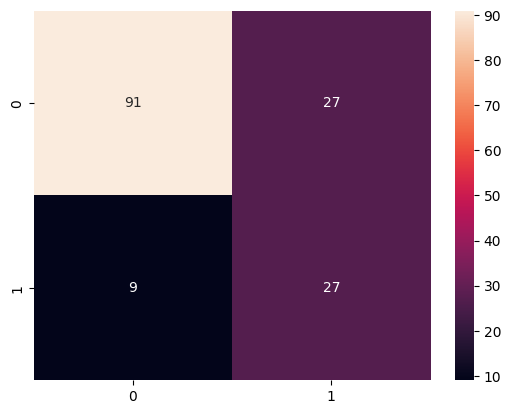

In [30]:
sns.heatmap(cf_matrix, annot=True)